In [1]:
from glob import glob
import re
from matplotlib import pyplot as plt
from dateutil.parser import parse
import pandas as pd

In [2]:
error_file_lines = dict()
for error_file in glob('../data/second-proc-only-run/err_*.log'):
    year = error_file.split('_')[1].split('.')[0]
    with open(error_file) as f:
        error_file_lines[year] = list(f)

In [3]:
out_file_lines = dict()
for out_file in glob('../data/second-proc-only-run/output_*.log'):
    year = out_file.split('_')[1].split('.')[0]
    with open(out_file) as f:
        out_file_lines[year] = list(f)

In [4]:
def split_err_lines(lines):
    incorrect_lines = []
    cached_lines = []
    duration_lines = []
    other_lines = []
    error_lines = []
    for l in lines:
        if 'Incorrect' in l:
            incorrect_lines.append(l)
        elif (' took ' in l):
            duration_lines.append(l)
        elif ('Skipping' in l) and ('cached' in l):
            cached_lines.append(l)
        elif ('Skipping' in l) and ('Error' in l):
            error_lines.append(l)
        else:
            other_lines.append(l)
#     assert len(other_lines) <= 2, len(other_lines)
    return incorrect_lines, duration_lines, cached_lines, error_lines, other_lines

In [5]:
def split_out_lines(lines):
    progress_lines = []
    other_lines = []
    for l in lines:
        if 'Estimated' in l:
            progress_lines.append(l)
        else:
            other_lines.append(l)
    assert len(other_lines) <= 2, str(len(other_lines))
    return progress_lines, other_lines

In [6]:
incorrect_lines_19, duration_lines_19, cached_lines_19, error_lines_19, other_19 = \
    split_err_lines(error_file_lines['19'])
incorrect_lines_20, duration_lines_20, cached_lines_20, error_lines_20, other_20 = \
    split_err_lines(error_file_lines['20'])
incorrect_lines_21, duration_lines_21, cached_lines_21, error_lines_21, other_21 = \
    split_err_lines(error_file_lines['21'])
progress_lines_19, other_19 = split_out_lines(out_file_lines['19'])
progress_lines_20, other_20 = split_out_lines(out_file_lines['20'])
progress_lines_21, other_21 = split_out_lines(out_file_lines['21'])

In [7]:
def file_num_vs_time_left(progress_lines):
    n = []
    etas = []
    ts = []
    for l in progress_lines:
        match = re.match('^\[(.+)\] ([0-9]+)/.+in: ([0-9]+\.[0-9]+) hours.+$', l)
        if match:
            t, i, eta = match.groups()
            t = parse(t)
            n.append(int(i))
            etas.append(float(eta))
            ts.append(t)
    plt.scatter(ts, etas)

### Progress

In [8]:
[len(starts) for starts in [progress_lines_19, progress_lines_20, progress_lines_21]]

[4054, 4425, 2771]

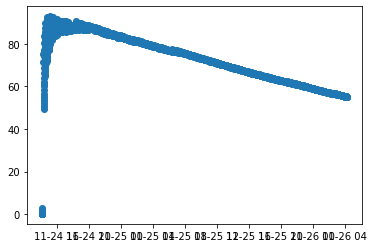

In [9]:
file_num_vs_time_left(progress_lines_19)

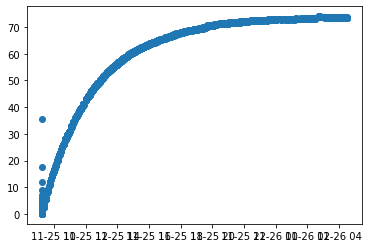

In [10]:
file_num_vs_time_left(progress_lines_20)

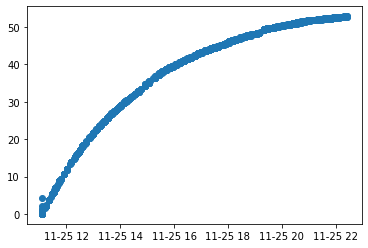

In [11]:
file_num_vs_time_left(progress_lines_21)

### Durations

In [138]:
durations_data = []
for y, duration_lines in [(19, duration_lines_19), (20, duration_lines_20),(21, duration_lines_21)]:
    durations_data += [(
        y, 
        l.split(' ')[0].split('/')[-1], 
        int(l.split(' ')[-1].replace('\n', ''))) 
        for l in duration_lines]
durations_df = pd.DataFrame(durations_data, ['year', 'file', 'duration'])
durations_df['file_type'] = durations_df.file.str.extract('dpef.html-([a-z-]+)\.nq-[0-9]+\.gz')[0]

ValueError: Shape of passed values is (3981, 3), indices imply (3, 3)

In [136]:
durations_df.groupby('file_type').duration.apply(lambda s: (s.max(), s.min(), s.mean(), s.median(), s.shape[0]))

file_type
embedded-jsonld      (615, 358, 518.6633333333333, 527.0, 300)
mf-adr                 (506, 157, 412.7142857142857, 444.0, 7)
mf-geo                             (407, 407, 407.0, 407.0, 1)
mf-hcard             (861, 605, 727.1328790459966, 725.0, 587)
mf-hrecipe                         (367, 107, 247.0, 267.0, 3)
mf-hreview              (375, 48, 264.1666666666667, 291.0, 6)
mf-xfn                             (760, 688, 720.5, 712.0, 6)
microdata          (1345, 238, 413.1280487804878, 418.0, 1148)
rdfa                         (455, 235, 368.453125, 377.5, 64)
Name: duration, dtype: object

### Incomplete

In [113]:
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_19]

In [114]:
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_19]

In [115]:
set(completed) - set(started)

set()

NOTE: Two 2019 file that I touched but don't remember what they were. Check in the zsh history perhaps.

From history:

```
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02657.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-rdfa.nq-03918.gz
```

#### Calculating touch intervention at 25 Nov. 10:15

In [109]:
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_20]

In [110]:
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_20]

In [112]:
[print('touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]

touch /nfs/data/webdatacommons/out/2020/dpef.html-microdata.nq-00004.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02464.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02752.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00031.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02745.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02627.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02559.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02414.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02561.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02698.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02576.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02678.gz
touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02581.gz
t

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

`Intervention` Ran above and restarted:
```
sbatch -c 10 -J lrmi20 -o output_20.log -e err_20.log run_sbatch_20.sh
```

In [116]:
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_21]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_21]
[print('touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]

touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02477.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-04541.gz


[None, None]

`Intervention` Ran above and restarte 21

#### Calculating touch intervention at 25 Nov. 12:04

In [145]:
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_21]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_21]
[print('touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]

touch /nfs/data/webdatacommons/out/2021/dpef.html-mf-hcard.nq-01297.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-mf-hcard.nq-01302.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02709.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-microdata.nq-07389.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-mf-hcard.nq-01260.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02592.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02634.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02565.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02398.gz
touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02756.gz


[None, None, None, None, None, None, None, None, None, None]

`Intervention` Ran above and restarte 21

#### Calculating touch intervention at 26 Nov. 8:12

In [24]:
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_21]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_21]
print("""TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 21' | awk '{print $1}'`""")
print("""ssh devbox2 -- scancel $TO_CANCEL""")
print("sleep 5")
[print('ssh devbox2 -- touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]
print("ssh devbox2 -- sbatch -c 10 -J lrmi21 -o output_21.log -e err_21.log run_sbatch_21.sh")

TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 21' | awk '{print $1}'`
ssh devbox2 -- scancel $TO_CANCEL
sleep 5
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02399.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02668.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02725.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02539.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-mf-hcard.nq-01301.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02708.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02637.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02379.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2021/dpef.html-embedded-jsonld.nq-02586.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out

In [25]:
year = 20
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_20]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_20]
print("""TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 20' | awk '{print $1}'`""")
print("""ssh devbox2 -- scancel $TO_CANCEL""")
print("sleep 5")
[print('ssh devbox2 -- touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]
print(f"ssh devbox2 -- sbatch -c 10 -J lrmi{year} -o output_{year}.log -e err_{year}.log run_sbatch_{year}.sh")

TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 20' | awk '{print $1}'`
ssh devbox2 -- scancel $TO_CANCEL
sleep 5
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02368.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00032.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02512.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-hreview.nq-00002.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02632.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-hreview.nq-00001.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02465.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00040.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02753.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embed

In [26]:
year = 19
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_19]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_19]
print("""TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 19' | awk '{print $1}'`""")
print("""ssh devbox2 -- scancel $TO_CANCEL""")
print("sleep 5")
[print('ssh devbox2 -- touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]
print(f"ssh devbox2 -- sbatch -c 10 -J lrmi{year} -o output_{year}.log -e err_{year}.log run_sbatch_{year}.sh")

TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 19' | awk '{print $1}'`
ssh devbox2 -- scancel $TO_CANCEL
sleep 5
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2019/dpef.html-mf-hcard.nq-00965.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-05160.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-03664.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2019/dpef.html-mf-hcard.nq-01102.gz
ssh devbox2 -- sbatch -c 10 -J lrmi19 -o output_19.log -e err_19.log run_sbatch_19.sh


#### Calculating touch intervention at 26 Nov.21:12

In [13]:
year = 20
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_20]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_20]
print("""TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 20' | awk '{print $1}'`""")
print("""ssh devbox2 -- scancel $TO_CANCEL""")
print("sleep 5")
[print('ssh devbox2 -- touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]
print(f"ssh devbox2 -- sbatch -c 10 -J lrmi{year} -o output_{year}.log -e err_{year}.log run_sbatch_{year}.sh")

TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 20' | awk '{print $1}'`
ssh devbox2 -- scancel $TO_CANCEL
sleep 5
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02505.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02467.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00026.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02722.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02388.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-hreview.nq-00002.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00009.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-jsonld.nq-02624.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-mf-xfn.nq-00025.gz
ssh devbox2 -- touch /nfs/data/webdatacommons/out/2020/dpef.html-embedded-

In [ ]:
year = 21
started = [re.match('^.* \[(.*)\].*$', l).groups()[0] for l in progress_lines_20]
completed = [re.match('^(.*?) .*$', l).groups()[0] for l in duration_lines_20]
print("""TO_CANCEL=`ssh devbox2 -- 'squeue | grep sebast | grep 21' | awk '{print $1}'`""")
print("""ssh devbox2 -- scancel $TO_CANCEL""")
print("sleep 5")
[print('ssh devbox2 -- touch ' + f.replace('commons/', 'commons/out/')) for f in set(started) - set(completed)]
print(f"ssh devbox2 -- sbatch -c 10 -J lrmi{year} -o output_{year}.log -e err_{year}.log run_sbatch_{year}.sh")

### Reset Touched Files

In [ ]:
touched_files = [
    
]